<a href="https://colab.research.google.com/github/NonKhuna/SuperAI_Engineer/blob/master/22p21c0495_khunanon_W2HW3_27092020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working on Data**

## **Import Library**

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


## **Load Data**

In [ ]:
#Import data
#credit https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv
!gdown --id 1ydp9q3WTf-O8QndErGI3mah-R3jB6V26

Downloading...
From: https://drive.google.com/uc?id=1ydp9q3WTf-O8QndErGI3mah-R3jB6V26
To: /content/New_York_City_Airbnb_Open_Data.zip
2.56MB [00:00, 80.6MB/s]


In [ ]:
!unzip /content/New_York_City_Airbnb_Open_Data.zip

In [ ]:
df = pd.read_csv("/content/AB_NYC_2019.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## **Clean data**

**remove**
*   last_review
*   host_name
*   id
*   clean outlier

**add**
*   minimum_price 
*   Null data





In [ ]:
drop_elements =["last_review",'host_name',"id"]
df.drop(drop_elements,axis=1,inplace=True)

In [ ]:
#clean outlier
df['minimum_nights'] = df[df['minimum_nights']<365]['minimum_nights']

In [ ]:
#before fill add Null data
print(df.isna().sum())

df[df['name'].isna()== True]
df.fillna({'name':'-','reviews_per_month':0},inplace=True)

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                       43
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
#สังเกตุว่าจะมีจำนวนคืนขั้นต่ำ จึงกำหนดเงินขั้นต่ำที่จ่าย เป็น price*minimum_nights = minimum_price
df['minimum_price'] = df['price']*df["minimum_nights"]

## **Visualization**

In [ ]:
df.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,minimum_price
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9,0.21,6,365,149.0
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45,0.38,2,355,225.0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0,0.00,1,365,450.0
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1.0,270,4.64,1,194,89.0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9,0.10,1,0,800.0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3.0,74,0.59,1,129,600.0
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45.0,49,0.40,1,0,2700.0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2.0,430,3.47,1,220,158.0
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2.0,118,0.99,1,0,158.0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1.0,160,1.33,4,188,150.0


In [ ]:
df['minimum_price'].value_counts()

300.0      1114
150.0      1017
100.0       981
200.0       890
600.0       737
           ... 
1348.0        1
1876.0        1
1189.0        1
1378.0        1
71820.0       1
Name: minimum_price, Length: 2088, dtype: int64

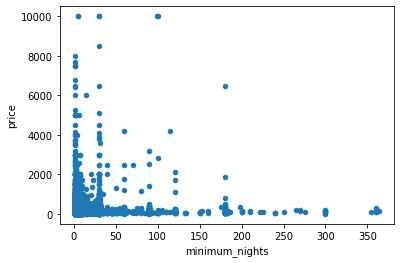

In [ ]:
df.plot.scatter(x="minimum_nights",y="price")

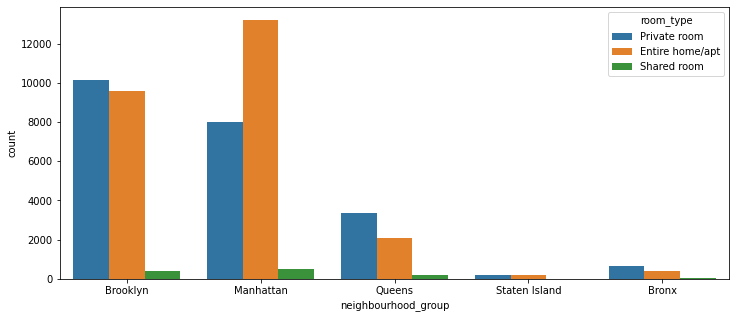

In [ ]:
fig = plt.subplots(figsize = (12,5))
sns.countplot(x = 'neighbourhood_group', hue = 'room_type', data = df)

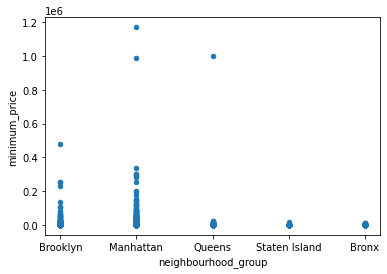

In [ ]:
df.plot.scatter(y="minimum_price",x="neighbourhood_group")

## **Cluster**

hierarchical clustering <br>
Complete-linkage


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
def show_result(Z, title, xlabel, ylabel):
    fig = plt.figure(figsize=(60, 50))
    dendrogram(Z, labels=df_grouped.neighbourhood.to_list(), leaf_rotation=0, orientation="left")
    my_palette = plt.cm.get_cmap("Accent", 3)
    plt.title(title,fontsize=50)
    plt.xlabel(xlabel,fontsize=30)
    plt.ylabel(ylabel,fontsize=30)
    plt.show()

In [ ]:
df_grouped = df.groupby('neighbourhood').mean().reset_index().loc[:,['neighbourhood','minimum_price']]
list_grouped_minimumPrice_mean = [ [price] for price in df_grouped.minimum_price.to_list()]
df_grouped.head(10)

,neighbourhood,minimum_price
0,Allerton,184.500000
1,Arden Heights,749.250000
2,Arrochar,303.571429
3,Arverne,325.597403
4,Astoria,1618.020022
5,Bath Beach,181.588235
6,Battery Park City,4542.231884
7,Bay Ridge,2723.914286
8,Bay Terrace,334.666667
9,"Bay Terrace, Staten Island",1050.000000


In [ ]:
Z = linkage(list_grouped_minimumPrice_mean, 'complete')

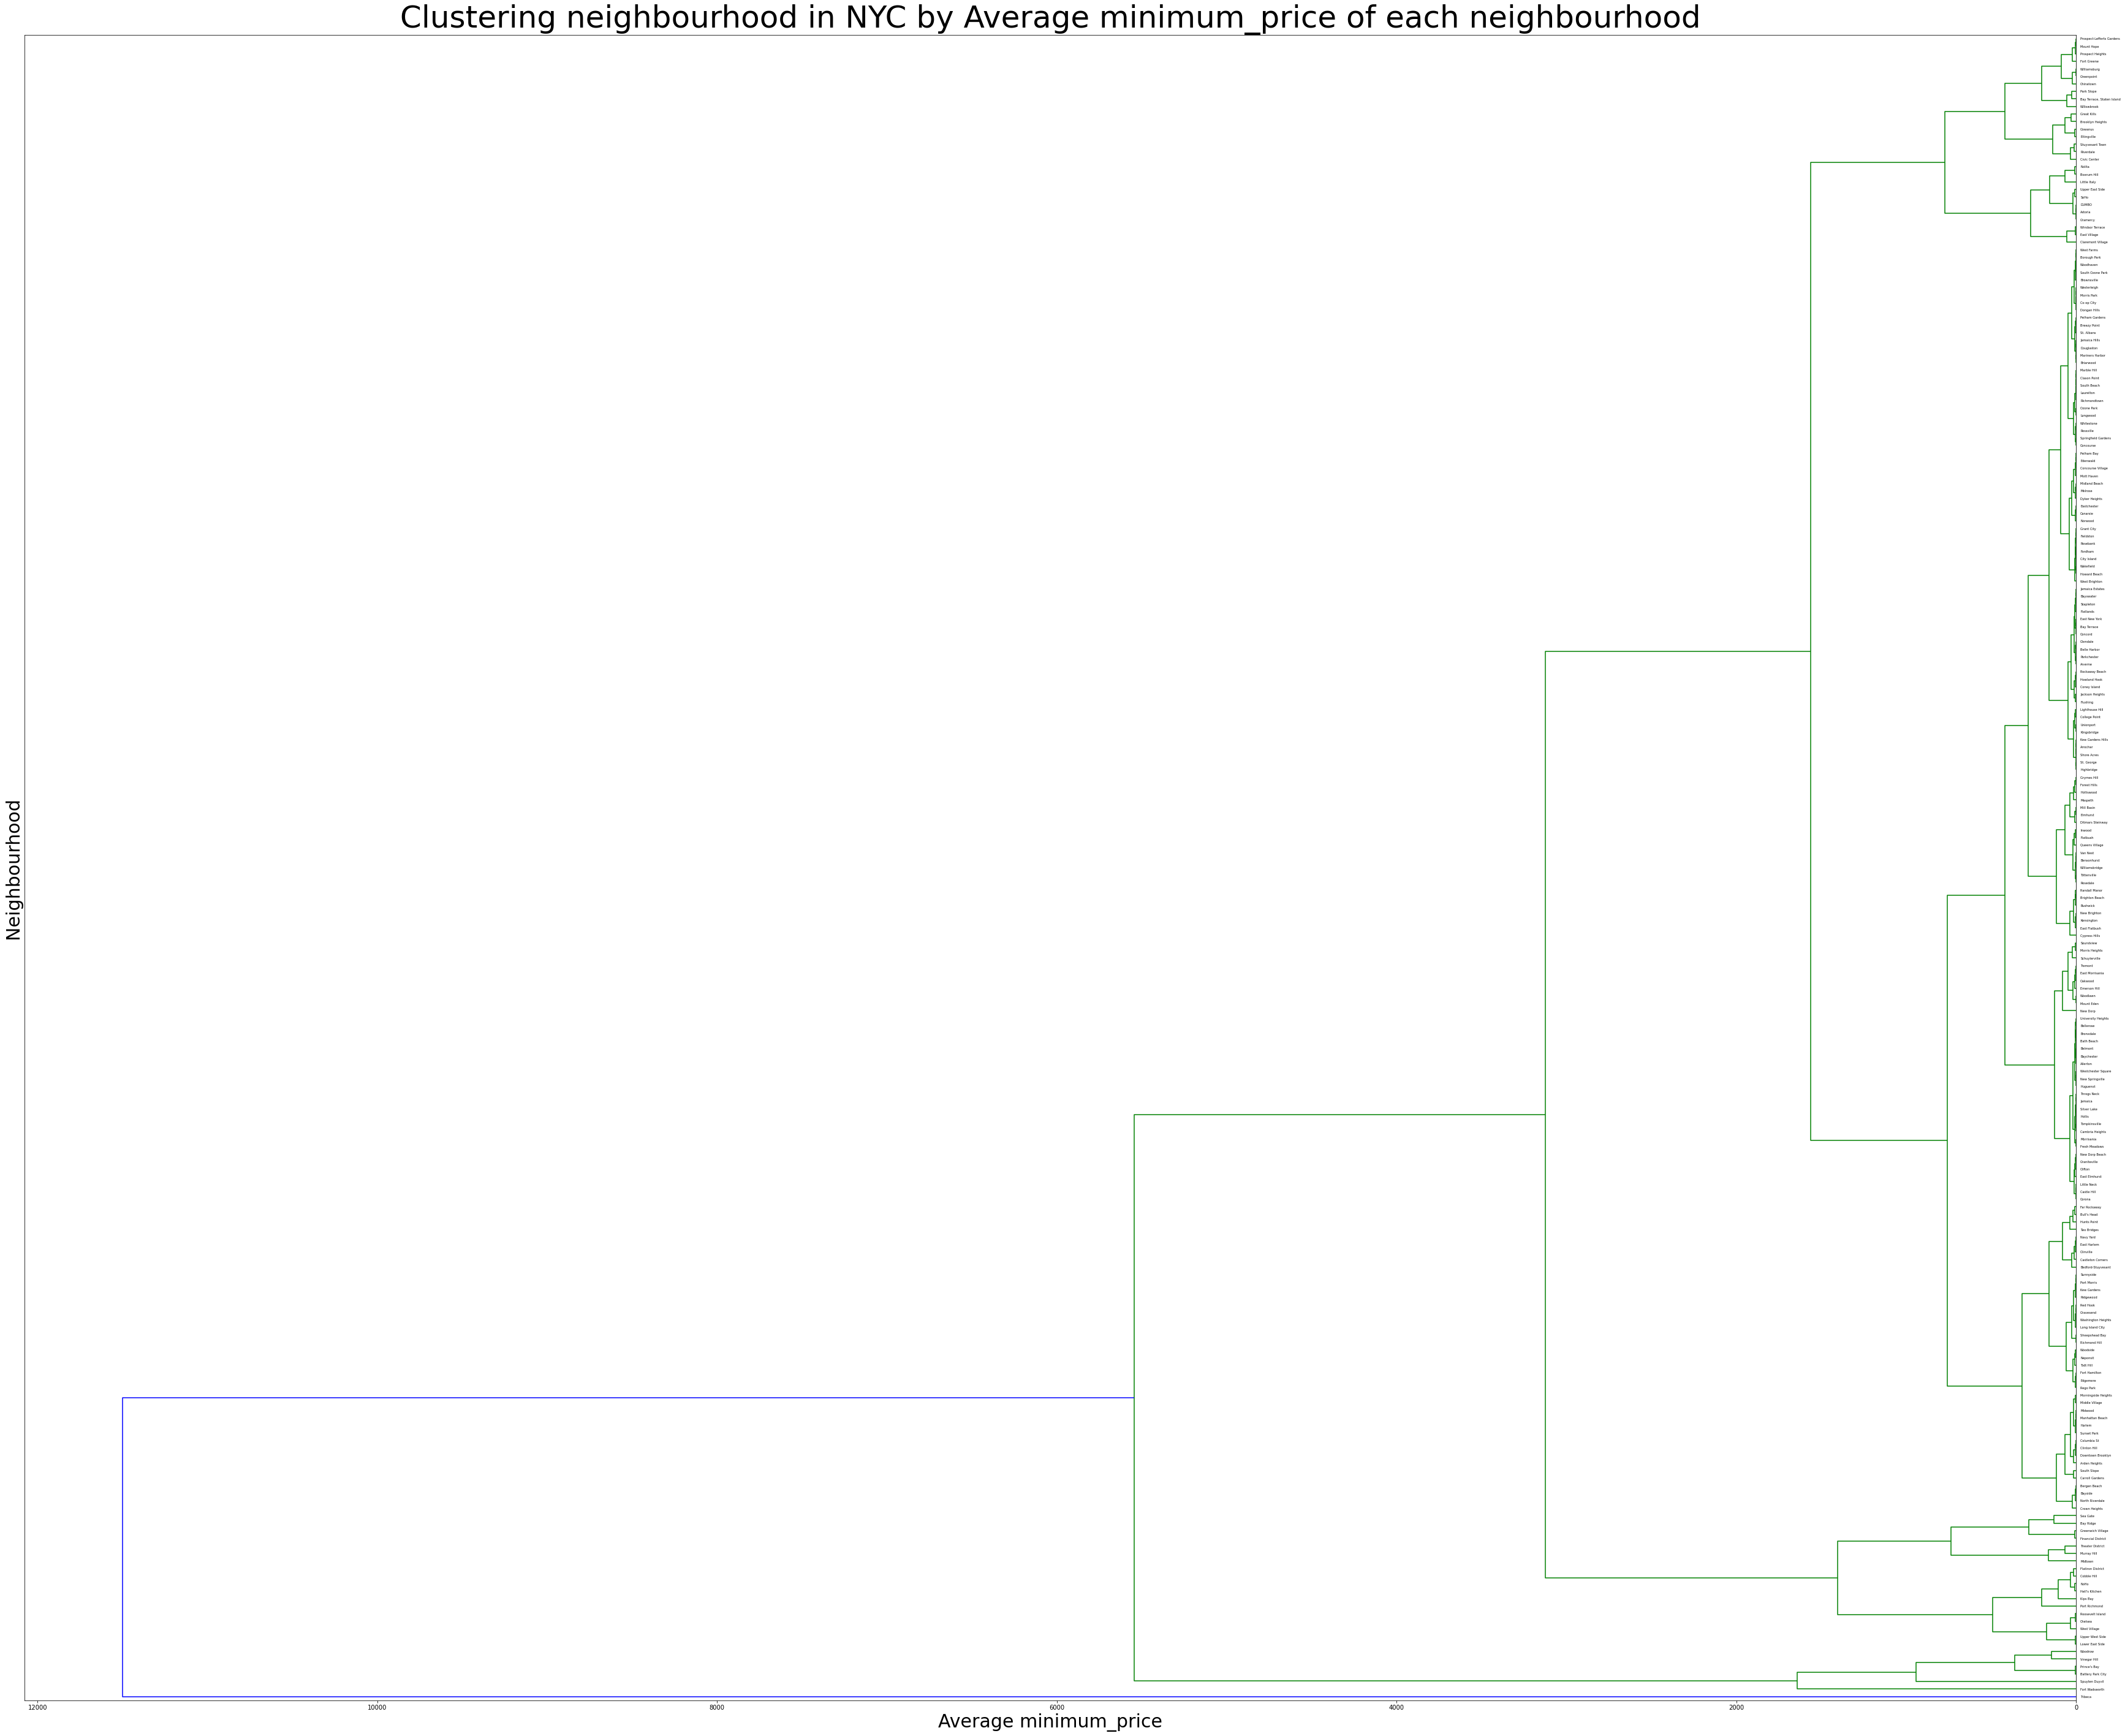

In [ ]:
title = 'Clustering neighbourhood in NYC by Average minimum_price of each neighbourhood'
xlabel = 'Average minimum_price'
ylabel = 'Neighbourhood'

show_result(Z, title, xlabel, ylabel)